# Feature Selection by filter methods:  <span style="color:blue"> categorical input - categorical output</span>

In this case, statistical methods are used:
We always have continuous and discrete variables in the data set.
This procedure applies to the relations of discrete independent variables in relation to discrete result variables.
Below I show the analysis of discrete variables when the resulting value is discrete.


https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/


## Preparation of discrete data for the procedure
data from the Titanic disaster

In [1]:
import pandas as pd

df = pd.read_csv('/home/wojciech/Pulpit/1/kaggletrain.csv',sep=',',nrows=1000000)

print()
print(df.shape)
print()
print(df.columns)


(891, 13)

Index(['Unnamed: 0', 'PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age',
       'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


### We choose only discrete variables
Because we are testing discrete data with discrete data, there must be only discrete variables of type 'object' in the test set.
The following code throws out all independent variables identified by Pandas as continuous. This must be verified and possibly converted to a discrete format.
The 'object' format is the most economical of formats in terms of memory usage.

In [2]:
import numpy as np

continuous_vars = df.describe().columns
df[continuous_vars].agg(['nunique','dtypes','min','max','median'])

,Unnamed: 0,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
nunique,891,891,2,3,88,7,7,248
dtypes,int64,int64,int64,int64,float64,int64,int64,float64
min,0,1,0,1,0.42,0,0,0
max,890,891,1,3,80,8,6,512.329
median,445,446,0,3,28,0,0,14.4542


### We are replacing detected discrete variables with the 'object' format

In [3]:
df['Survived'] = df['Survived'].astype(object)
df['Pclass'] = df['Pclass'].astype(object)
df['SibSp'] = df['SibSp'].astype(object)
df['Parch'] = df['Parch'].astype(object)


### I can make a discrete variable out of the Age variable

In [4]:
Ewa = ['dziecko', 'młody','średni','starszy','stary']

df['Age2'] = pd.qcut(df['Age'],5, labels=Ewa)
df['Age2'] = df['Age2'].astype('object')

In [5]:
df[['Age','Age2']].sample(3)

,Age,Age2
311,18.0,dziecko
712,48.0,stary
17,NaN,NaN


Once again we check what could have been wrong.

In [6]:
import numpy as np
continuous_vars = df.describe().columns
df[continuous_vars].agg(['nunique','dtypes','min','max','median'])

,Unnamed: 0,PassengerId,Age,Fare
nunique,891,891,88,248
dtypes,int64,int64,float64,float64
min,0,1,0.42,0
max,890,891,80,512.329
median,445,446,28,14.4542


## Checking categorical variables

In [7]:
categorical_vars = df.describe(include=["object"]).columns

import numpy as np

df[categorical_vars].agg(['nunique','dtypes','min','max','median'])

,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Cabin,Embarked,Age2
nunique,2,3,891,2,7,7,681,147,3,5
dtypes,object,object,object,object,object,object,object,object,object,object
min,0,1,"Abbing, Mr. Anthony",female,0,0,110152,NaN,NaN,NaN
max,1,3,"van Melkebeke, Mr. Philemon",male,8,6,WE/P 5735,NaN,NaN,NaN
median,0,3,NaN,NaN,0,0,NaN,NaN,NaN,NaN


## Checking and clearing empty records in discrete variables

In [8]:
df[categorical_vars].isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
SibSp         0
Parch         0
Ticket        0
Cabin       687
Embarked      2
Age2        177
dtype: int64

### Deleting unnecessary columns

In [9]:
del df['Cabin']
del df['Name']
del df['Ticket']

In [10]:
categorical_vars = df.describe(include=["object"]).columns
df[categorical_vars].isnull().sum()

Survived      0
Pclass        0
Sex           0
SibSp         0
Parch         0
Embarked      2
Age2        177
dtype: int64

In [11]:
print(df.shape)
df=df.dropna(how='any')
print(df.shape)
df[categorical_vars].isnull().sum()


(891, 11)
(712, 11)


Survived    0
Pclass      0
Sex         0
SibSp       0
Parch       0
Embarked    0
Age2        0
dtype: int64

## I isolate a set of discrete variables
## Last variable should be y

In [12]:
#del df['id']
categorical_vars

Index(['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Age2'], dtype='object')

In [13]:
categorical_vars = ['Pclass','Sex','SibSp','Parch','Embarked','Age2','Survived']

In [14]:

print(df.info(memory_usage='deep'))
df[categorical_vars].head(3)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 11 columns):
Unnamed: 0     712 non-null int64
PassengerId    712 non-null int64
Survived       712 non-null object
Pclass         712 non-null object
Sex            712 non-null object
Age            712 non-null float64
SibSp          712 non-null object
Parch          712 non-null object
Fare           712 non-null float64
Embarked       712 non-null object
Age2           712 non-null object
dtypes: float64(2), int64(2), object(7)
memory usage: 284.4 KB
None


,Pclass,Sex,SibSp,Parch,Embarked,Age2,Survived
0,3,male,1,0,S,młody,0
1,1,female,1,0,C,starszy,1
2,3,female,0,0,S,średni,1


## Coding of discrete variables

In [15]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

df2 = df[categorical_vars].apply(LabelEncoder().fit_transform)
df2.head(4)

,Pclass,Sex,SibSp,Parch,Embarked,Age2,Survived
0,2,1,1,0,2,1,0
1,0,0,1,0,0,2,1
2,2,0,0,0,2,4,1
3,0,0,1,0,2,2,1


## I'm creating an array with dataframe

In [16]:
## tworzę array z dataframe
dataset = df2.values
dataset[:3]

array([[2, 1, 1, 0, 2, 1, 0],
       [0, 0, 1, 0, 0, 2, 1],
       [2, 0, 0, 0, 2, 4, 1]])

## Divides data into describing variables and a result variable

In [17]:
X = dataset[:, :-1]
y = dataset[:,-1]
y[:25]

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0])

## We divide the data into a training and test set

In [18]:
from sklearn.model_selection import train_test_split  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (477, 6) (477,)
Test (235, 6) (235,)


In [19]:
X_train[:5]

array([[2, 1, 0, 0, 0, 4],
       [0, 0, 1, 0, 2, 2],
       [1, 0, 0, 0, 2, 4],
       [2, 0, 1, 1, 2, 0],
       [2, 1, 0, 0, 2, 0]])

In [20]:
y_train[:35]

array([0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0])

## Definition

In [43]:
# Classification Assessment
def Classification_Assessment(model ,Xtrain, ytrain, Xtest, ytest, y_pred):
    import matplotlib.pyplot as plt
    from sklearn import metrics
    from sklearn.metrics import classification_report, confusion_matrix
    from sklearn.metrics import confusion_matrix, log_loss, auc, roc_curve, roc_auc_score, recall_score, precision_recall_curve
    from sklearn.metrics import make_scorer, precision_score, fbeta_score, f1_score, classification_report

    print("Recall Training data:     ", np.round(recall_score(ytrain, model.predict(Xtrain)), decimals=4))
    print("Precision Training data:  ", np.round(precision_score(ytrain, model.predict(Xtrain)), decimals=4))
    print("----------------------------------------------------------------------")
    print("Recall Test data:         ", np.round(recall_score(ytest, model.predict(Xtest)), decimals=4)) 
    print("Precision Test data:      ", np.round(precision_score(ytest, model.predict(Xtest)), decimals=4))
    print("----------------------------------------------------------------------")
    print("Confusion Matrix Test data")
    print(confusion_matrix(ytest, model.predict(Xtest)))
    print("----------------------------------------------------------------------")
    print(classification_report(ytest, model.predict(Xtest)))
    
    y_pred_proba = model.predict_proba(Xtest)[::,1]
    fpr, tpr, _ = metrics.roc_curve(ytest,  y_pred)
    auc = metrics.roc_auc_score(ytest, y_pred)
    plt.plot(fpr, tpr, label='Logistic Regression (auc = %0.2f)' % auc)
    plt.xlabel('False Positive Rate',color='grey', fontsize = 13)
    plt.ylabel('True Positive Rate',color='grey', fontsize = 13)
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.legend(loc=4)
    plt.plot([0, 1], [0, 1],'r--')
    plt.show()
    print('auc',auc)

# Model Logistic Regression on ordinary data

In [44]:
import numpy as np
from sklearn import model_selection
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

Parameteres = {'C': np.power(10.0, np.arange(-3, 3))}
LR = LogisticRegression(warm_start = True)
LR_Grid = GridSearchCV(LR, param_grid = Parameteres, scoring = 'roc_auc', n_jobs = -1, cv=2)

LR_Grid.fit(X_train, y_train) 
y_pred_LRC = LR_Grid.predict(X_test)

/home/wojciech/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Recall Training data:      0.6719
Precision Training data:   0.7771
----------------------------------------------------------------------
Recall Test data:          0.7396
Precision Test data:       0.7474
----------------------------------------------------------------------
Confusion Matrix Test data
[[115  24]
 [ 25  71]]
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.83      0.82       139
           1       0.75      0.74      0.74        96

    accuracy                           0.79       235
   macro avg       0.78      0.78      0.78       235
weighted avg       0.79      0.79      0.79       235



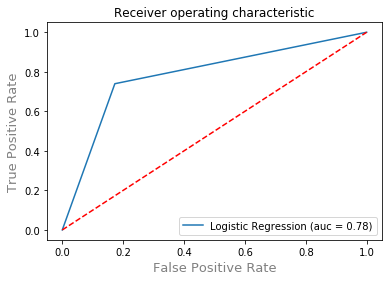

auc 0.7834607314148682


In [45]:
Classification_Assessment(LR_Grid ,X_train, y_train, X_test, y_test, y_pred_LRC)

# Mutual Information Feature Selection: Mutual_info_classif ()
Mmutual Information is usually used in the construction of decision trees for selecting variables.

In [24]:
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest


def select_features_MIC(X_train, y_train, X_test):
    MIC = SelectKBest(score_func=mutual_info_classif, k='all')
    MIC.fit(X_train, y_train)
    X_train_MIC = MIC.transform(X_train)
    X_test_MIC = MIC.transform(X_test)
    return X_train_MIC, X_test_MIC, MIC

In [25]:
import time
start_time = time.time() ## pomiar czasu: start pomiaru czasu
print(time.ctime())

X_train_MIC, X_test_MIC, MIC = select_features_MIC(X_train, y_train, X_test)

print('Time to complete the task')
print('minutes: ',
(time.time() - start_time)/60) ## koniec pomiaru czasu


Thu Mar 26 11:54:57 2020
Time to complete the task
minutes:  0.0006418029467264811


## Printing the results of the Mutual_info_classif () selection (the highest value is the best value)

In [26]:
df2.columns

Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Age2', 'Survived'], dtype='object')

In [27]:
for i in range(len(MIC.scores_)):
    print('Feature %d: %f' % (i, MIC.scores_[i]))

Feature 0: 0.066209
Feature 1: 0.175240
Feature 2: 0.029764
Feature 3: 0.010300
Feature 4: 0.041607
Feature 5: 0.000000


In [28]:
importance_mic = np.round(MIC.scores_, decimals=3)
importance_mic

array([0.066, 0.175, 0.03 , 0.01 , 0.042, 0.   ])

In [29]:
KOT_MIC = dict(zip(df2, importance_mic))
KOT_sorted_keys_MIC = sorted(KOT_MIC, key=KOT_MIC.get, reverse=True)

for r in KOT_sorted_keys_MIC:
    print (r, KOT_MIC[r])

Sex 0.175
Pclass 0.066
Embarked 0.042
SibSp 0.03
Parch 0.01
Age2 0.0


In [30]:
KOT_MIC

{'Pclass': 0.066,
 'Sex': 0.175,
 'SibSp': 0.03,
 'Parch': 0.01,
 'Embarked': 0.042,
 'Age2': 0.0}

<function matplotlib.pyplot.show(*args, **kw)>

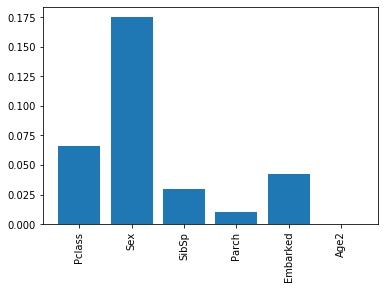

In [31]:
import matplotlib.pyplot as plt

plt.bar(*zip(*KOT_MIC.items()))
plt.xticks(rotation=90)
plt.show

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

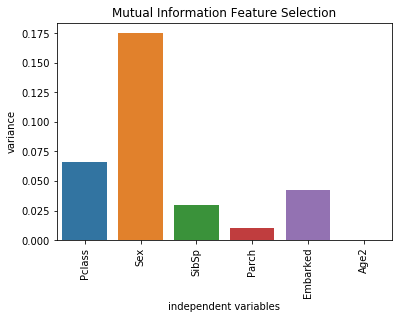

In [32]:
import seaborn as sns

sns.barplot(list(KOT_MIC.keys()), list(KOT_MIC.values()))
plt.title('Mutual Information Feature Selection')
plt.ylabel('variance')
plt.xlabel('independent variables')
plt.xticks(rotation=90)

## Logistic regression for Mutual Information

Logistic regression is a good model for testing feature selection methods because it can work better if irrelevant features are removed from the model.

In [33]:
def red(text):
    print('\033[31m', text, '\033[0m', sep='')

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, log_loss, auc, roc_curve, roc_auc_score, recall_score, precision_recall_curve
from sklearn.metrics import make_scorer, precision_score, fbeta_score, f1_score, classification_report

MIC_model = LogisticRegression(solver='lbfgs')
MIC_model.fit(X_train_MIC, y_train)
# evaluate the model
yMIC = MIC_model.predict(X_test_MIC)

Recall Training data:      0.6823
Precision Training data:   0.7939
----------------------------------------------------------------------
Recall Test data:          0.7188
Precision Test data:       0.7582
----------------------------------------------------------------------
Confusion Matrix Test data
[[117  22]
 [ 27  69]]
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.84      0.83       139
           1       0.76      0.72      0.74        96

    accuracy                           0.79       235
   macro avg       0.79      0.78      0.78       235
weighted avg       0.79      0.79      0.79       235



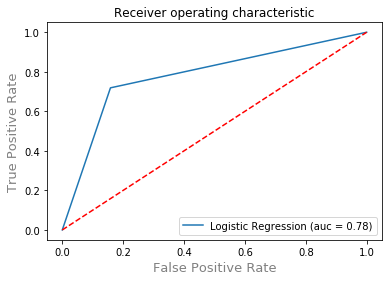

auc 0.780238309352518


In [34]:
Classification_Assessment(MIC_model ,X_train_MIC, y_train, X_test_MIC, y_test, yMIC)

# Feature Selection by Chi-Squared

In [35]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

def select_features_CH2(X_train, y_train, X_test):
    CH2 = SelectKBest(score_func=chi2, k=4)
    CH2.fit(X_train, y_train)
    X_train_CH2 = CH2.transform(X_train)
    X_test_CH2 = CH2.transform(X_test)
    return X_train_CH2, X_test_CH2, CH2

In [36]:
import time
start_time = time.time() ## pomiar czasu: start pomiaru czasu
print(time.ctime())

X_train_CH2, X_test_CH2, CH2 = select_features_CH2(X_train, y_train, X_test)

print('Time to complete the task')
print('minutes: ',
(time.time() - start_time)/60) ## koniec pomiaru czasu

Thu Mar 26 11:54:58 2020
Time to complete the task
minutes:  4.2319297790527344e-05


### Printing the results of the Chi-Squared selection (the highest value is the best value)

In [37]:
df2.columns

Index(['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Age2', 'Survived'], dtype='object')

In [38]:
for i in range(len(CH2.scores_)):
    print('Feature %d: %f' % (i, CH2.scores_[i]))

Feature 0: 35.246035
Feature 1: 47.804273
Feature 2: 0.612330
Feature 3: 5.163853
Feature 4: 5.452485
Feature 5: 0.016795


In [39]:
importance_CH2 = np.round(CH2.scores_, decimals=3)
importance_CH2

KOT_CH2 = dict(zip(df2, importance_CH2))
KOT_CH2_sorted_keys = sorted(KOT_CH2, key=KOT_CH2.get, reverse=True)

for r in KOT_CH2_sorted_keys:
    print (r, KOT_CH2[r])

Sex 47.804
Pclass 35.246
Embarked 5.452
Parch 5.164
SibSp 0.612
Age2 0.017


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

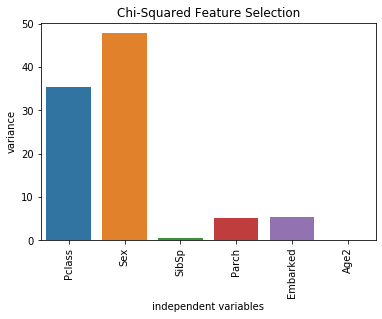

In [40]:
import seaborn as sns

sns.barplot(list(KOT_CH2.keys()), list(KOT_CH2.values()))

plt.title('Chi-Squared Feature Selection')
plt.ylabel('variance')
plt.xlabel('independent variables')

plt.xticks(rotation=90)

## Logistic regression for Chi-Squared

In [41]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, log_loss, auc, roc_curve, roc_auc_score, recall_score, precision_recall_curve
from sklearn.metrics import make_scorer, precision_score, fbeta_score, f1_score, classification_report

CH2_model = LogisticRegression(solver='lbfgs')
CH2_model.fit(X_train_CH2, y_train)
# evaluate the model
yCH2 = CH2_model.predict(X_test_CH2)


Recall Training data:      0.6562
Precision Training data:   0.773
----------------------------------------------------------------------
Recall Test data:          0.7188
Precision Test data:       0.7263
----------------------------------------------------------------------
Confusion Matrix Test data
[[113  26]
 [ 27  69]]
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       139
           1       0.73      0.72      0.72        96

    accuracy                           0.77       235
   macro avg       0.77      0.77      0.77       235
weighted avg       0.77      0.77      0.77       235



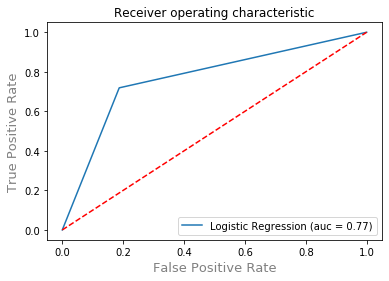

auc 0.7658498201438849


In [42]:
Classification_Assessment(CH2_model ,X_train_CH2, y_train, X_test_CH2, y_test, yCH2)